In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy
from lab_utils_multi import  load_house_data, run_gradient_descent
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w

In [3]:
prop = pd.read_csv('uae-real-estate.csv')
prop.head() #5

,Name,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price
0,Elegant Unit| Golf Views| High-Floor| Prime Area,Apartment,24.463860,54.595603,747,0,1,Abu Dhabi,Yas Island,1300000
1,Sea & City View | Full Facilities | Prime Area,Apartment,24.487354,54.395122,"1,524",2,3,Abu Dhabi,Al Reem Island,1700000
2,Hot Offer|Furnished 2BR+M|Full Sea View|High F...,Apartment,24.492602,54.392677,"1,615",2,3,Abu Dhabi,Al Reem Island,1650000
3,Amazing Deal| Huge Layout | Big Terrace| Inves...,Apartment,24.484639,54.404103,"1,220",1,2,Abu Dhabi,Al Reem Island,800000
4,Luxurious Lifestyl|Exclusive Amenities|Invest Now,Apartment,24.538734,54.410601,"5,315",4,5,Abu Dhabi,Saadiyat Island,19000000


In [80]:
def rescale(arr):
    mean = arr.mean()
    sd = arr.std()

    new_arr = (arr - mean)/sd

    new_arr = new_arr/20

    return new_arr, mean, sd

In [81]:
def upscale(value, mean, sd):
    new_value = ((value*sd) + mean)*20

    return new_value

In [82]:
df = pd.DataFrame(prop,columns=['Area','Price'])

In [83]:
x = np.array([(int(i.replace(',', ''))) for i in prop["Area"].to_numpy()]).astype(float)
y = np.array(prop["Price"].to_numpy()).astype(float)
x_train, x_mean, x_sd = rescale(x)
y_train, y_mean, y_sd = rescale(y)

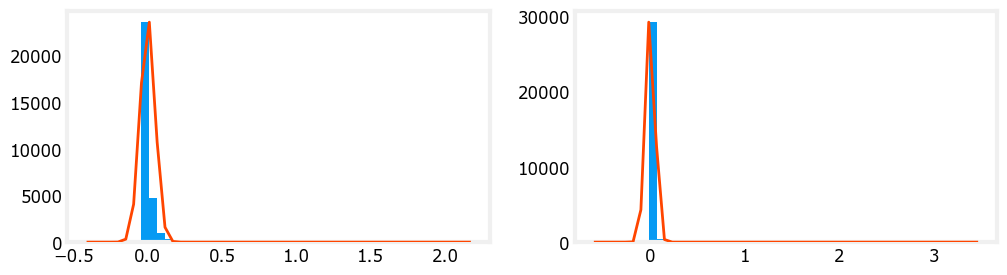

In [84]:
fig,ax=plt.subplots(1, 2, figsize=(12, 3))

norm_plot(ax[0],x_train,)
norm_plot(ax[1],y_train,)

In [85]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 29905


Text(0.5, 0, 'Size (sqm)')

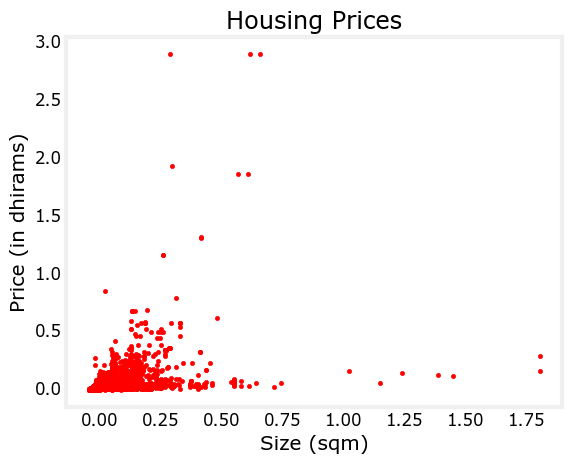

In [86]:
plt.scatter(x_train, y_train, marker='.', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in dhirams)')
plt.xlabel('Size (sqm)')

In [87]:
tmp_w = 0.5
tmp_b = 0.1

In [88]:
def compute_model_output(x, w, b):

    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

In [89]:
tmp_f_wb = compute_model_output(x_train, tmp_w, tmp_b)
print(tmp_f_wb)

[0.08414102 0.08992763 0.09060534 ... 0.09320448 0.21263067 0.09702498]


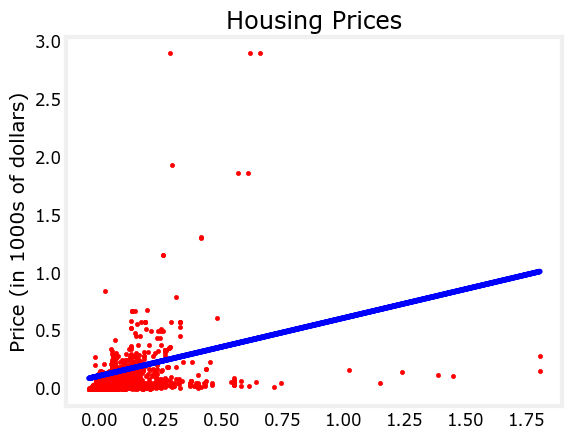

In [90]:
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='.', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.show()

In [91]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [92]:
total = compute_cost(x_train, y_train, tmp_w, tmp_b)
print(total)

0.005971264739856092


In [93]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [94]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i<100000:
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

In [96]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 1.25e-03  dj_dw: -1.182e-03, dj_db:  4.509e-18   w:  1.182e-05, b:-4.50935e-20
Iteration 1000: Cost 1.24e-03  dj_dw: -1.153e-03, dj_db:  4.672e-17   w:  1.169e-02, b:-1.25907e-18
Iteration 2000: Cost 1.22e-03  dj_dw: -1.125e-03, dj_db: -3.846e-17   w:  2.308e-02, b: 6.65973e-19
Iteration 3000: Cost 1.21e-03  dj_dw: -1.097e-03, dj_db:  9.079e-18   w:  3.419e-02, b:-9.19718e-19
Iteration 4000: Cost 1.20e-03  dj_dw: -1.070e-03, dj_db: -1.581e-17   w:  4.502e-02, b:-2.10525e-18
Iteration 5000: Cost 1.19e-03  dj_dw: -1.044e-03, dj_db: -2.053e-17   w:  5.559e-02, b:-2.32089e-18
Iteration 6000: Cost 1.18e-03  dj_dw: -1.018e-03, dj_db:  2.697e-18   w:  6.589e-02, b: 7.45197e-21
Iteration 7000: Cost 1.17e-03  dj_dw: -9.926e-04, dj_db:  1.476e-17   w:  7.595e-02, b:-1.91796e-18
Iteration 8000: Cost 1.16e-03  dj_dw: -9.681e-04, dj_db:  2.064e-17   w:  8.575e-02, b:-1.98810e-18
Iteration 9000: Cost 1.15e-03  dj_dw: -9.442e-04, dj_db:  1.739e-18   w:  9.531e-02, b:-9.54429e-19


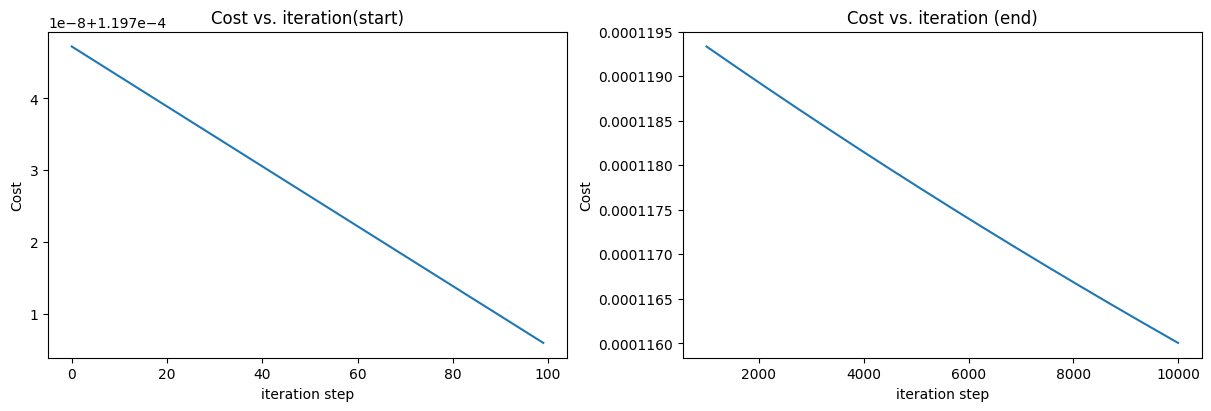

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()